In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("C:\\Users\\thege\\OneDrive\\Escritorio\\IH\\Week 5\\lab-eda-univariate\\amz_uk_price_prediction_dataset.csv")

In [8]:
# Checking for missing data
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
df.describe() 

,uid,stars,reviews,price,boughtInLastMonth
count,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06,2.443651e+06
mean,1.370545e+06,2.152836e+00,4.806278e+02,8.924381e+01,2.589699e+01
std,8.160562e+05,2.194865e+00,5.944124e+03,3.456089e+02,2.404837e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.589215e+05,0.000000e+00,0.000000e+00,9.990000e+00,0.000000e+00
50%,1.349029e+06,0.000000e+00,0.000000e+00,1.909000e+01,0.000000e+00
75%,2.060686e+06,4.400000e+00,5.900000e+01,4.599000e+01,0.000000e+00
max,2.828593e+06,5.000000e+00,1.356658e+06,1.000000e+05,5.000000e+04


In [15]:
df.nunique() 

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [44]:
#Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
#Frequency Tables:
    #Generate a frequency table for the product category.
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [48]:
    #Which are the top 5 most listed product categories?
top = df['category'].value_counts().head()
top

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

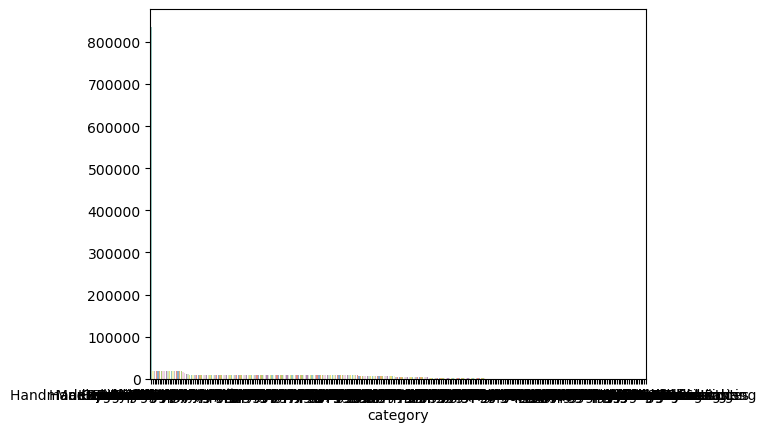

In [43]:
#Visualizations:
    #Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

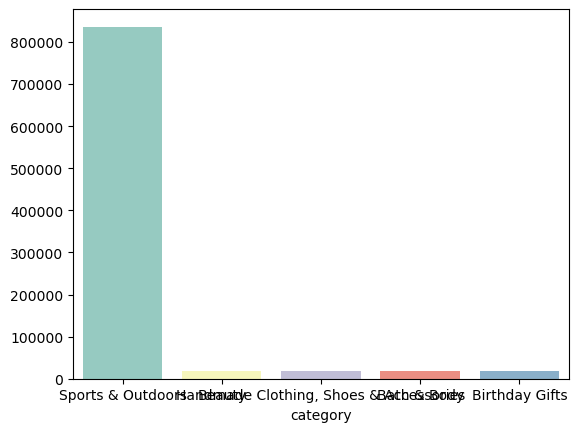

In [49]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
sns.barplot(x=top.index, y=top.values, palette="Set3");

In [54]:
#Measures of Dispersion:
    #Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [55]:
    #How varied are the product prices? Are there any indicators of a significant spread in prices?
#Variance may be the best indicator to determine the if there is a signicant spread

C:\Users\thege\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

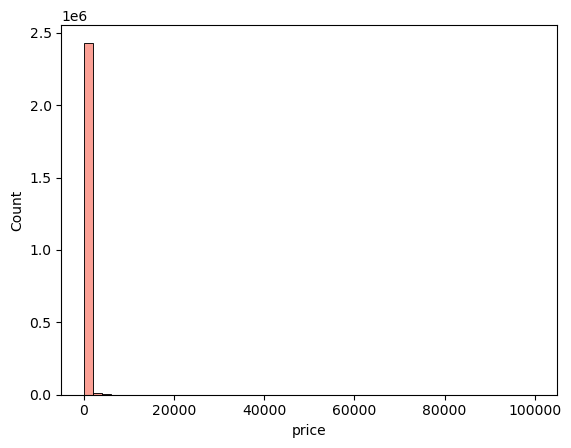

In [63]:
#Visualizations:
    #Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df['price'], bins=50, color="salmon")    
#Its hard to read because ther are a lot of values in 0

<Axes: >

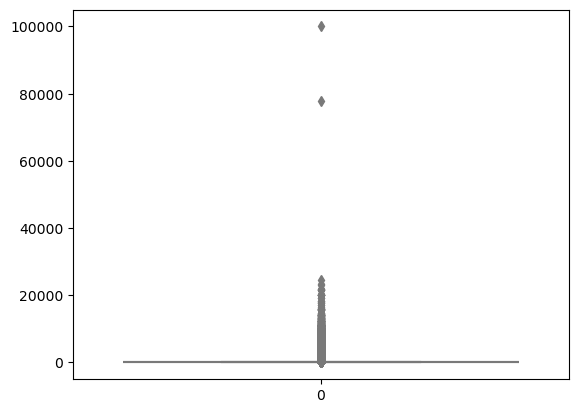

In [64]:
#Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="lightblue")

In [68]:
#Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#Measures of Centrality:
#Calculate the mean, median, and mode for the rating of products.
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()

print(mean_stars, median_stars, mode_stars)

2.152836472966065 0.0 0    0.0
Name: stars, dtype: float64


In [69]:
#Measures of Dispersion:
#Determine the variance, standard deviation, and interquartile range for product rating.
variance_st = df['stars'].var()
std_dev_st = df['stars'].std()
quantiles_st = df['stars'].quantile([0.25, 0.5, 0.75])

variance_st, std_dev_st, quantiles_st

(4.81743402976196,
 2.1948653785054697,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [70]:
#Shape of the Distribution:
#Calculate the skewness and kurtosis for the rating column.
skewness_st = df['stars'].skew()
kurtosis_st = df['stars'].kurtosis()

skewness_st, kurtosis_st

(0.08120735761080985, -1.9260061280432985)

C:\Users\thege\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='stars', ylabel='Count'>

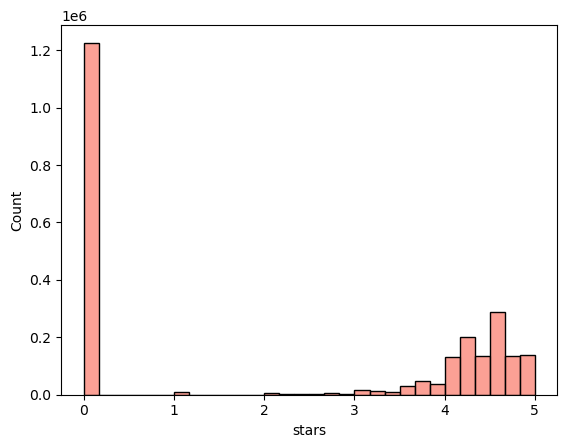

In [71]:
#Visualizations:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'],bins=30, color="salmon")